# Response to reviewers

This notebook makes figures to answer reviewers questions.

## 0 Packages

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.size'] = 2  # Length of major ticks
plt.rcParams['ytick.major.size'] = 2  # Length of major ticks
plt.rcParams['xtick.minor.size'] = 1  # Length of minor ticks
plt.rcParams['ytick.minor.size'] = 1  # Length of minor ticks
from myimagelib import readdata, bestcolor

## 1 Compare glycerol-water surface with beet juice surface

In [6]:
base_folder = "/Users/zhengyangliu/Library/CloudStorage/GoogleDrive-liuzy19911112@gmail.com/My Drive/Research projects/WPM/Data"

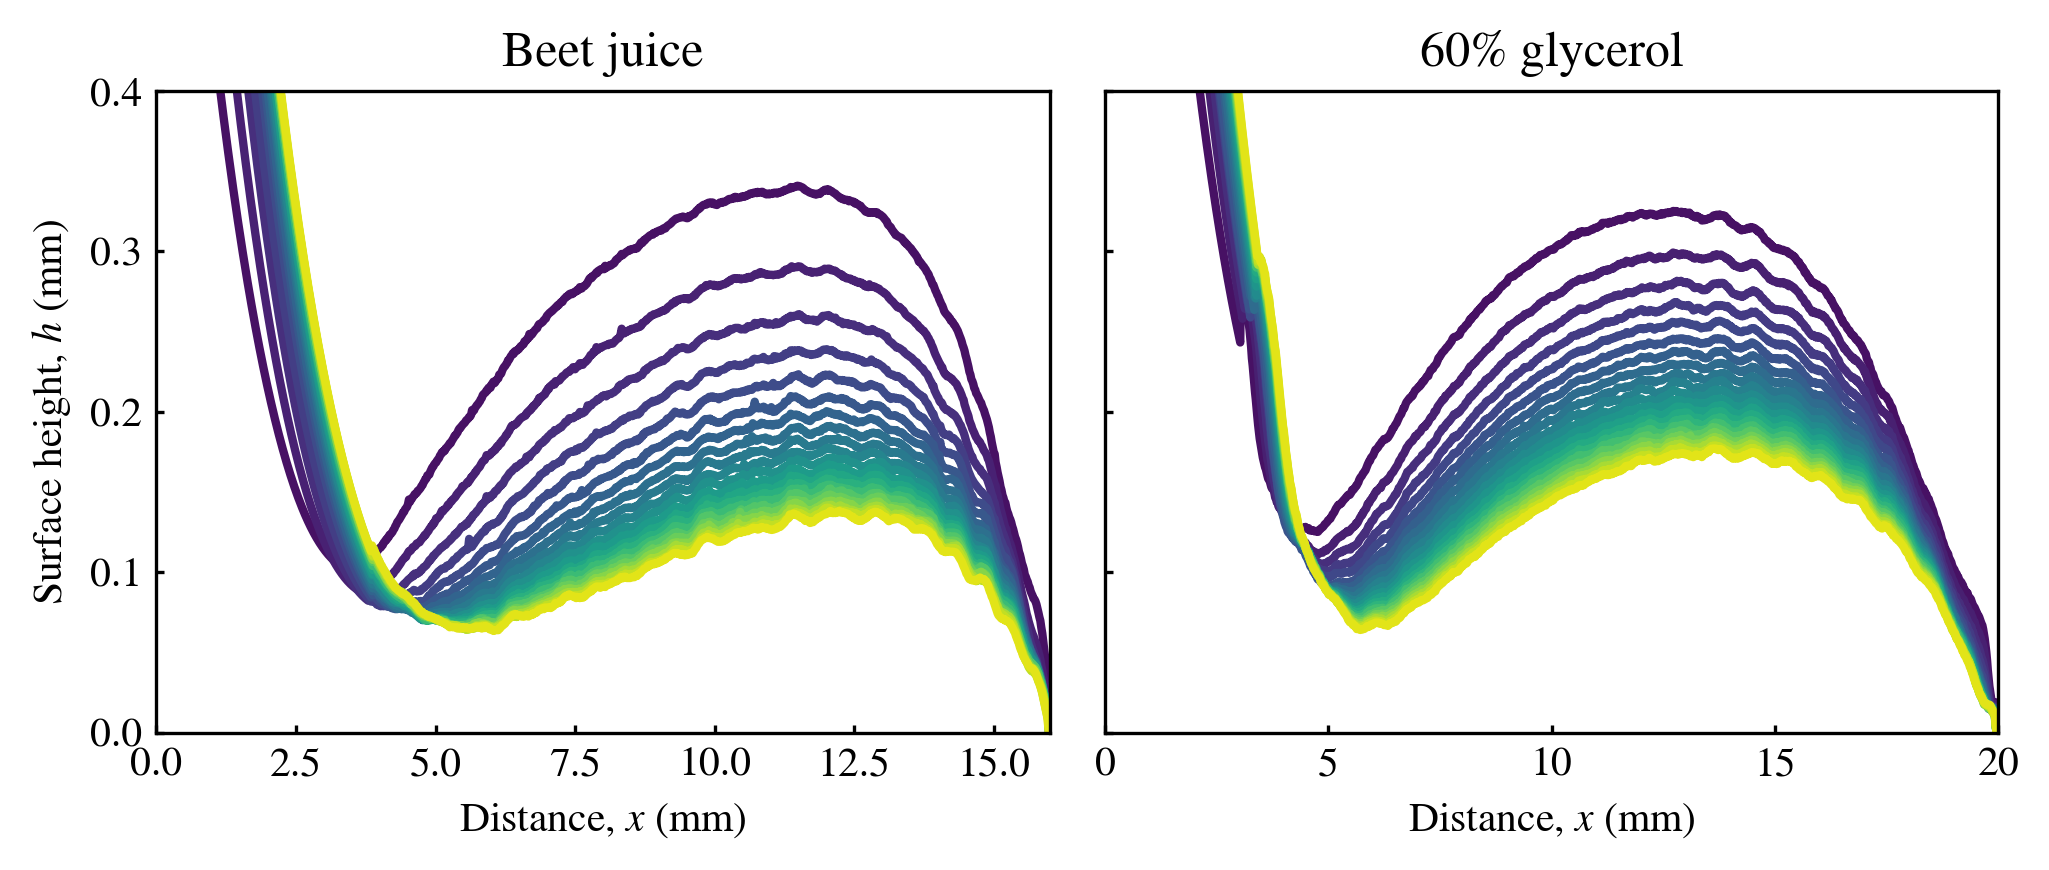

In [20]:
folder = os.path.join(base_folder, "08212024", "surface_profile")
name = "beetjuice_3_0.305"
df = pd.read_csv(os.path.join(folder, name+".csv")).set_index("x")
dimple = pd.read_csv(os.path.join(folder, "dimple_detection", name+".csv"))

fig, ax = plt.subplots(1, 2, figsize=(7, 3), dpi=300, sharey=True)
down_sample = 2
cmap = plt.get_cmap("viridis")
tmax = float(df.columns[-1])
n_curves = df.shape[1]
for i in range(2, n_curves-1, down_sample):
    # read surface profile data for smoothing purpose
    x, y = df.index, df.iloc[:, i].values
    ax[0].plot(x, y, color=cmap(i/n_curves), lw=2)
    min_ind = dimple.loc[i//2, "minima_index"]
    max_ind = dimple.loc[i//2, "maxima_index"]
    if np.isnan(min_ind) or np.isnan(max_ind):
        continue
    # ax.scatter(x[int(min_ind)], dimple.loc[i//2, "minima"], color="blue", s=5, zorder=10)
    # ax.scatter(x[int(max_ind)], dimple.loc[i//2, "maxima"], color="red", s=5, zorder=10)

ax[0].set_xlim([0, 16])
ax[0].set_ylim([0, 0.4])
ax[0].set_xlabel("Distance, $x$ (mm)")
ax[0].set_ylabel("Surface height, $h$ (mm)")
ax[0].set_title("Beet juice")
folder = os.path.join(base_folder, "11122024", "surface_profile")
name = "gw60-15_0.253"
df = pd.read_csv(os.path.join(folder, name+".csv")).set_index("x")
tmax = float(df.columns[-1])
n_curves = df.shape[1]
for i in range(2, n_curves-1, down_sample):
    # read surface profile data for smoothing purpose
    x, y = df.index, df.iloc[:, i].values
    ax[1].plot(x, y, color=cmap(i/n_curves), lw=2)
    if np.isnan(min_ind) or np.isnan(max_ind):
        continue
    # ax.scatter(x[int(min_ind)], dimple.loc[i//2, "minima"], color="blue", s=5, zorder=10)
    # ax.scatter(x[int(max_ind)], dimple.loc[i//2, "maxima"], color="red", s=5, zorder=10)

ax[1].set_xlim([0, 20])
ax[1].set_ylim([0, 0.4])
ax[1].set_xlabel("Distance, $x$ (mm)")
# ax[1].set_ylabel("Surface height, $h$ (mm)")
ax[1].set_title("60% glycerol")

# add a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
# plt.colorbar(sm, ax=ax, label="Time (s)")
plt.tight_layout()

## 2 Contact line dynamics

To address the question regarding Tanner's law, we look in our data how the contact line spread on the vertical wall of the beet slice. Two types of measurements have been done: extrapolation and direct imaging. Here, I show the results from both. 

We can also show results from simulation. 

In [81]:
fps = 30
mpp = 6 / 1080
h0 = 1000

### 2.1 Direct imaging

In [101]:
folder = r"G:\My Drive\Research projects\WPM\Data\11152024\Contact_line_velocity_analysis\tracking"
l = readdata(folder, "csv")

In [102]:
df = pd.read_csv(l.Dir[0], usecols=["Y"], encoding="latin1")

Text(0, 0.5, 'Height (mm)')

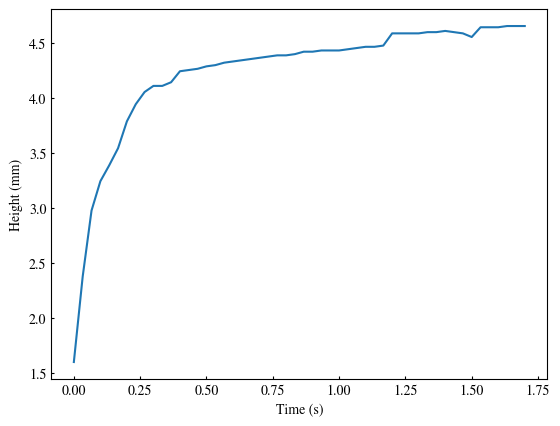

In [105]:
t = df.index / fps
h = (h0 - df.Y) * mpp
plt.plot(t, h)
# plt.xlim([0, 2])
# plt.ylim([0, 5])
# plt.loglog()
plt.xlabel("Time (s)")
plt.ylabel("Height (mm)")

### 2.2 Extrapolation

The data from extrapolation is noisier. A key issue is that the contact line rises rapidly (within a few seconds or even shorter, depending on the film thickness). So, in most cases, the extrapolation does not really capture the "rising" part. 

In [129]:
folder = r"G:\My Drive\Research projects\WPM\Data\11122024\surface_profile"
l = readdata(folder, "csv")

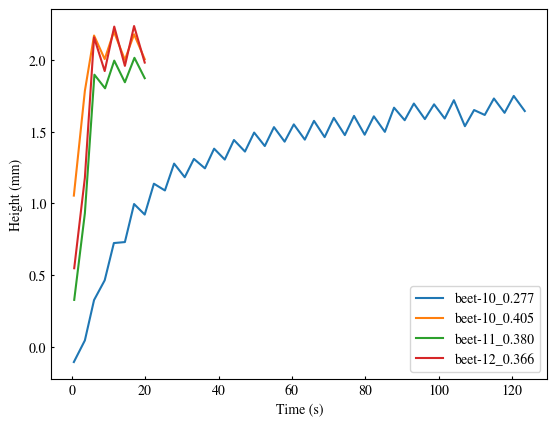

In [158]:
for i in range(0, 10, 3):
    df = pd.read_csv(l.Dir[i])
    contact_line_height = df.set_index("x").T.iloc[:, 0]
    plt.plot(contact_line_height.index.astype(float), contact_line_height.values, label=l.Name[i])
# plt.ylim([0, contact_line_height.values.max()])
plt.xlabel("Time (s)")
plt.ylabel("Height (mm)")
plt.legend()

### 2.3 Simulation

In [109]:
folder = r"G:\My Drive\Research projects\WPM\Data\Simulation\L24"
l = readdata(folder, "csv")

(0.0, 100.0)

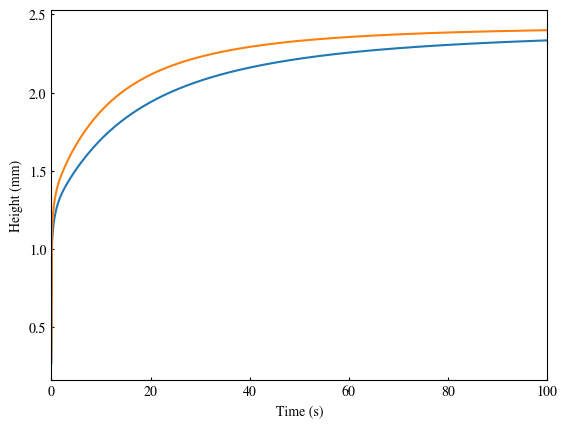

In [114]:
for i in range(20, 30, 5):
    df = pd.read_csv(l.Dir[i])
    contact_line_height = df.set_index("x").T.iloc[:, 0]
    plt.plot(contact_line_height.index.astype(float), contact_line_height.values)
# plt.ylim([0, contact_line_height.values.max()])
plt.xlabel("Time (s)")
plt.ylabel("Height (mm)")
plt.xlim([0, 100])

### 2.4 Plot together

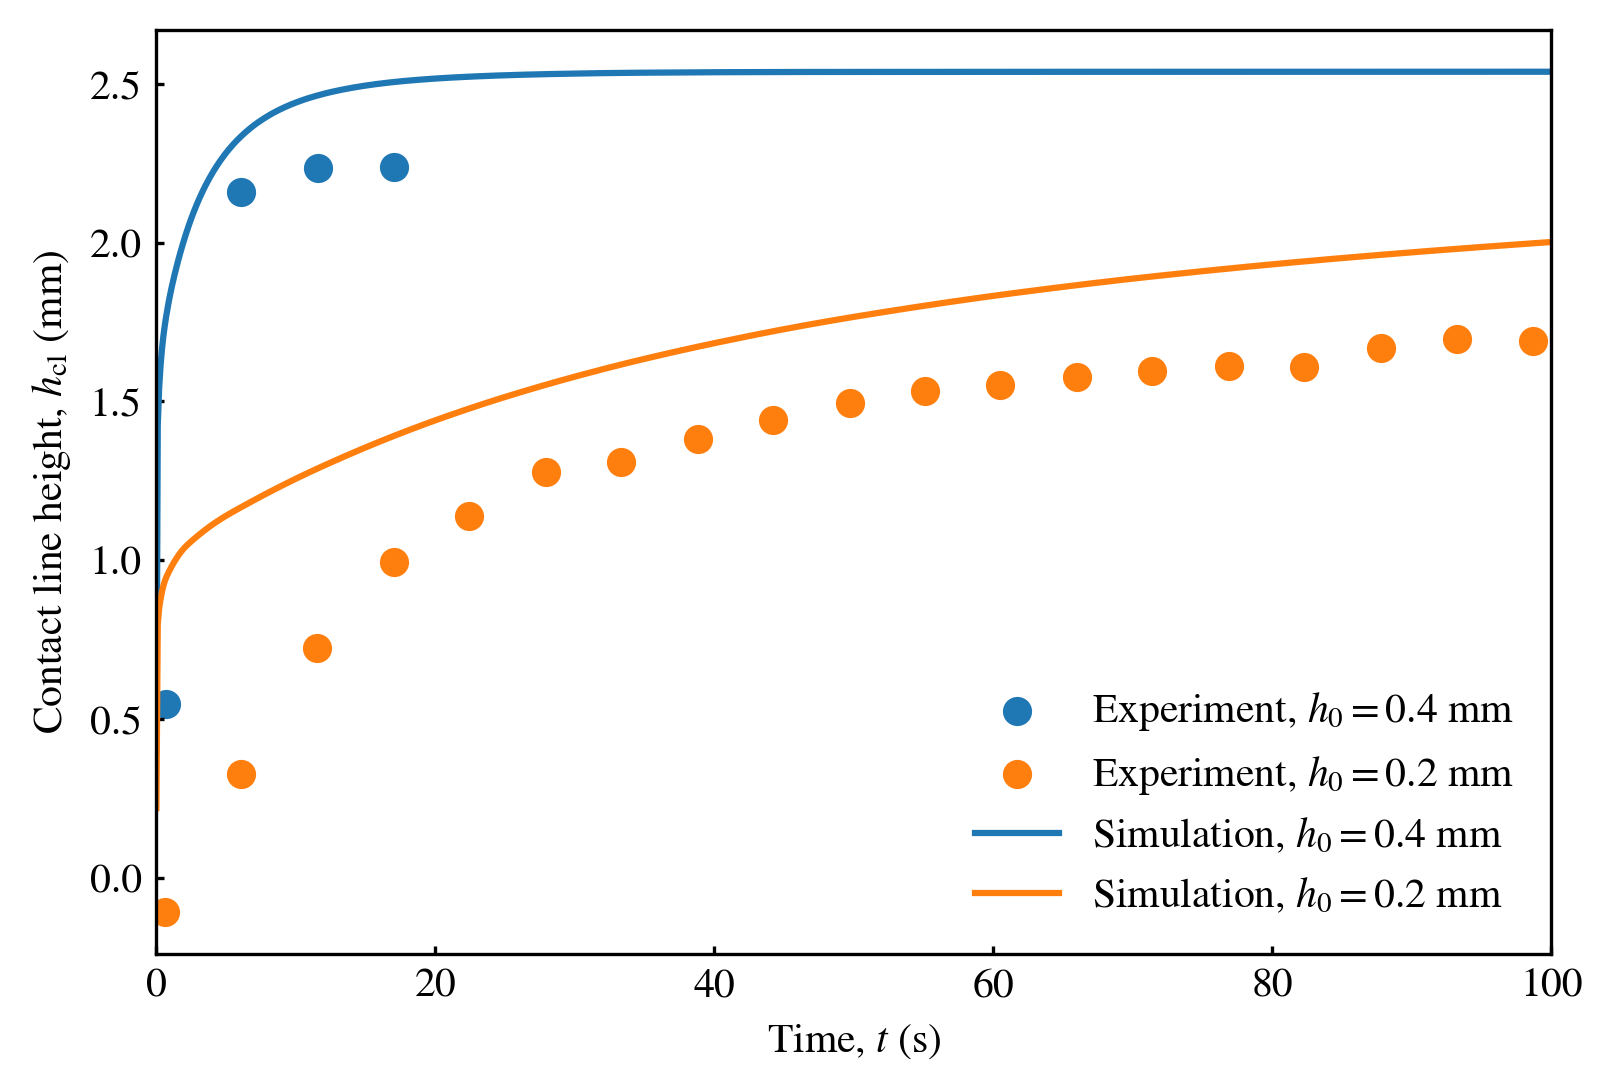

In [163]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# extrapolation
# thick film, h0 = 0.4 mm
fileDir = r"G:\My Drive\Research projects\WPM\Data\11122024\surface_profile\beet-12_0.366.csv"
df = pd.read_csv(fileDir)
contact_line_height = df.set_index("x").T.iloc[::2, 0]
t, h = contact_line_height.index.astype(float), contact_line_height.values
ax.scatter(t, h, color=bestcolor(0), label="Experiment, $h_0=0.4$ mm")

# thin film, h0 = 0.2 mm
fileDir = r"G:\My Drive\Research projects\WPM\Data\11122024\surface_profile\beet-10_0.277.csv"
df = pd.read_csv(fileDir)
contact_line_height = df.set_index("x").T.iloc[::2, 0]
t, h = contact_line_height.index.astype(float), contact_line_height.values
ax.scatter(t, h, color=bestcolor(1), label="Experiment, $h_0=0.2$ mm")
# ax.loglog()

# simulation
folder = r"G:\My Drive\Research projects\WPM\Data\Simulation\L24"
# thick film, h0 = 0.4 mm
df = pd.read_csv(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_4.02e-04_L_2.40e-02.csv"))
contact_line_height = df.set_index("x").T.iloc[:, 0]
t, h = contact_line_height.index.astype(float), contact_line_height.values
ax.plot(t, h, color=bestcolor(0), label="Simulation, $h_0=0.4$ mm")

# thin film, h0 = 0.2 mm
df = pd.read_csv(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_2.20e-04_L_2.40e-02.csv"))
contact_line_height = df.set_index("x").T.iloc[:, 0]
t, h = contact_line_height.index.astype(float), contact_line_height.values
ax.plot(t, h, color=bestcolor(1), label="Simulation, $h_0=0.2$ mm")

ax.set_xlim([0, 100])
plt.xlabel("Time, $t$ (s)")
plt.ylabel("Contact line height, $h_\mathrm{cl}$ (mm)")
ax.legend(frameon=False)

## 3 Lubrication time scale

The reviewer correctly pointed out the time scale arising from the lubrication equation as 

$$
t_\mathrm{lub} \sim \frac{\mu L}{\sigma} \left( \frac{L}{h} \right)^3
$$

For a typical set of parameters $\mu=0.01\;\mathrm{Pa\cdot s}$, $L=24\;\mathrm{mm}$, $\sigma=0.042\;\mathrm{N/m}$, $h_0=0.3\;\mathrm{mm}$, we can estimate the time scale $t_\mathrm{lub} \approx 3000\;\mathrm{s}$.

However, both our simulation and experiment suggest that the height ratio between dimple and apex reach 0.5 around 30 seconds after the solid-liquid contact (Fig. 5c). This time scale is 100 times faster than $t_\mathrm{lub}$. If we consider that the film thickness $h$ gets smaller over time, the difference can be even larger. Clearly, $t_\mathrm{lub}$ is not the time scale $\tau$ that gives rise to the sufficient color contrast for the dimple to be observed. 

Why are $t_\mathrm{lub}$ and $\tau$ so different? We believe the difference arises from the definition of the "final state". When estimating $t_\mathrm{lub}$, we define the final state as when $p \sim \sigma h / L^2$. At this time, the spatial variation in the curvature is very small, and the driving force arises from surface tension is negligible. However, when we define the "final state" as when the height ratio is larger than 0.5, it is often the early stage of the surface tension smoothing process. See the illustration below. 

![alt text](dimple_time_and_lub_time.png)

We realized in our experiment that, at $t_\mathrm{dimple}$, in thin films ($<0.3\;\mathrm{mm}$), the curvature at the dimple was still quite localized, instead of being spreaded to the whole length of the film. So, we were looking for an (larger) alternative scaling for pressure $p\sim \sigma h/L^2$ that captured the dimple time. Interestingly, we observed that at early times, for thin films, $p$ shows a correlation with the dimple height $h_\mathrm{min}$ (shown in Fig.A3). Therefore, we use $p\sim \sigma/h$ in the scaling analysis. This resulted in the difference between the scaling in Eq.2 and the $t_\mathrm{lub}$. By considering an $h=0.03\;\mathrm{mm}$ smaller than $h_0$, and the prefactor 3, we can estimate the dimple time again using 

$$
\tau = \frac{3\mu L^2}{\sigma h} \approx 13.7\;\mathrm{s}.
$$

This is reasonably close to the $t_\mathrm{dimple}$ ($\sim 30\;\mathrm{s}$) we observed in experiment. 

We note that the pressure scaling $p\sim \sigma/h$ is by no means a perfect choice. However, it bears an important qualitative observation from experiment: the pressure at play at $t\lt t_\mathrm{dimple}$ is much larger than $\sigma h/L^2$.

## 4 Ripple width

We plot the dimple distance from the beet side wall as a function of time. 

In [226]:
folder = r"G:\My Drive\Research projects\WPM\Data\11122024\surface_profile\dimple_detection"
dimple = pd.read_csv(os.path.join(folder, "dimple_time.csv"))

In [287]:
dimple = dimple.sort_values("h0ext")
dimple = dimple.iloc[[name.startswith("beet") for name in dimple["name"]]]
dimple = dimple.reset_index(drop=True)
hmax, hmin = .35, dimple.h0ext.min()

In [288]:
dimple.head()

,name,h0,h0ext,t,date
0,beet-11,0.287,0.199178,100.0,2024-11-12
1,beet-9,0.288,0.208247,158.6,2024-11-12
2,beet-10,0.277,0.219815,120.4,2024-11-12
3,beet-5,0.281,0.222403,131.3,2024-11-12
4,beet-2,0.292,0.224663,100.0,2024-11-12


In [216]:
dx = 0.0174 # mm

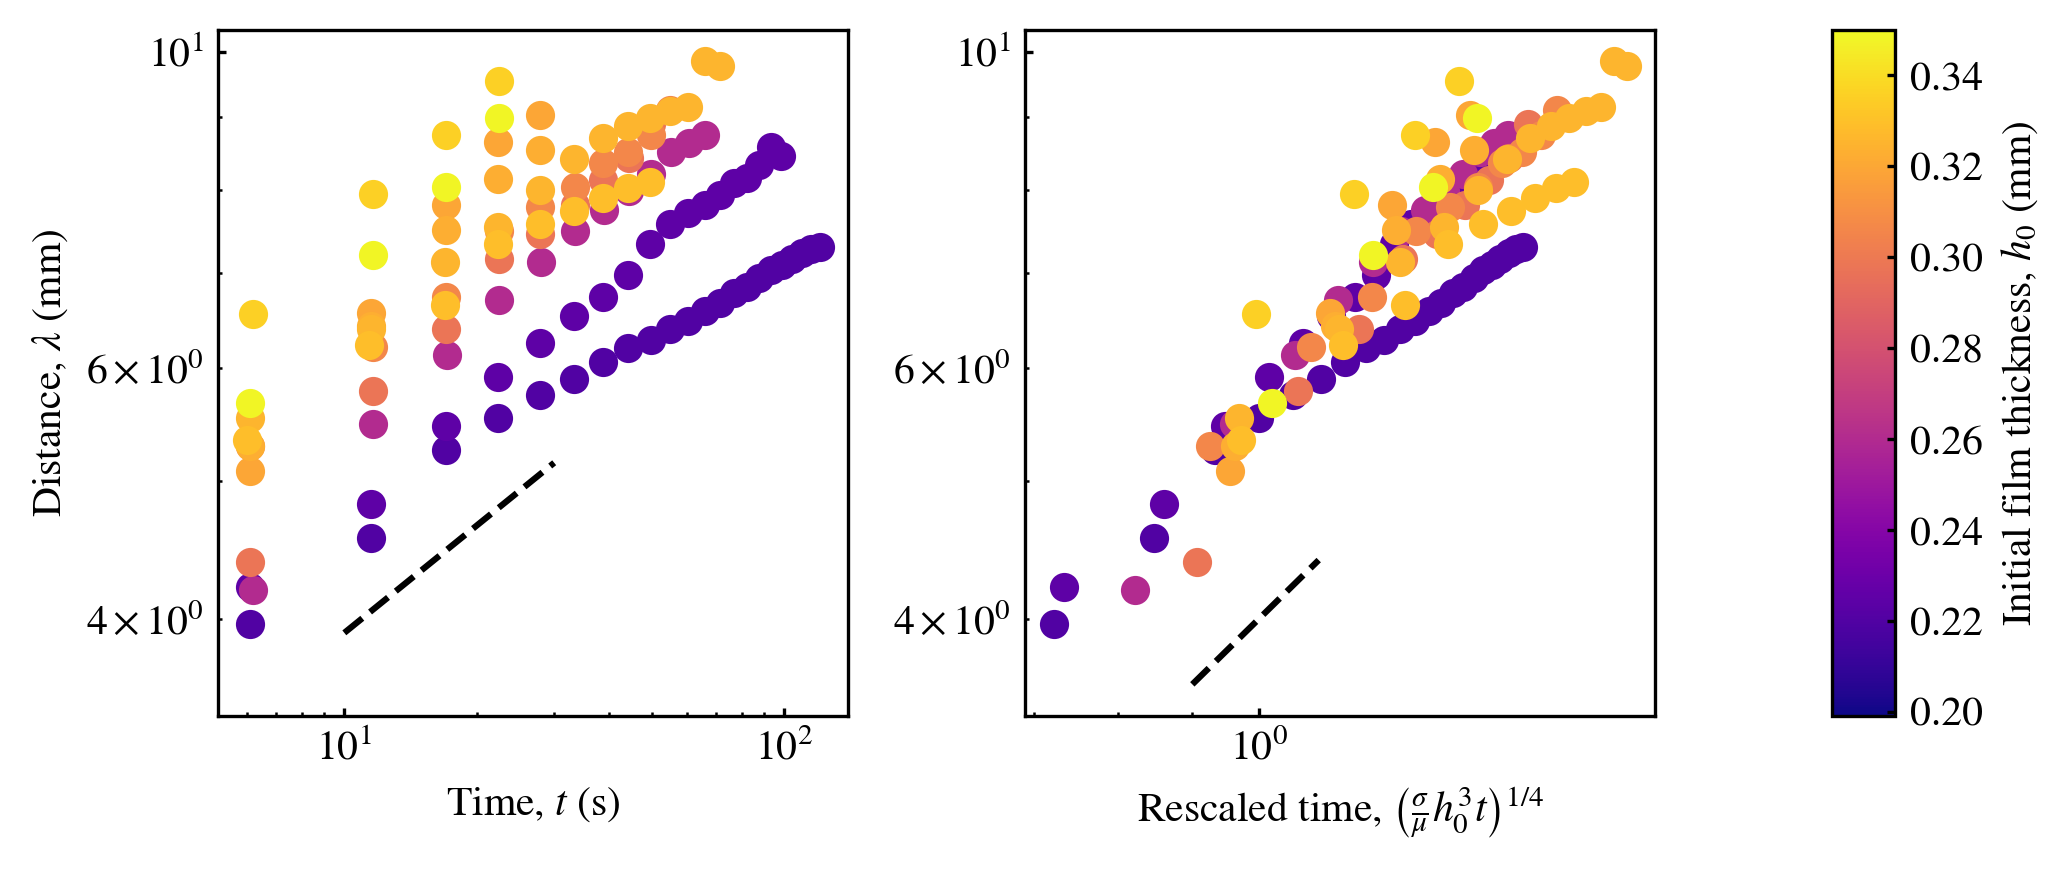

In [325]:
cmap = plt.get_cmap("plasma")
fig, ax = plt.subplots(1, 3, figsize=(7, 3), dpi=300, gridspec_kw={"width_ratios": [5, 5, .5]})
mu = 0.01
sigma =  42e-3
for num, i in dimple[2::2].iterrows():
    name = i["name"]
    fileDir = os.path.join(folder, f"{name}_{i.h0:.3f}.csv")
    df = pd.read_csv(fileDir)[1:]
    color = cmap((i.h0ext-hmin)/(hmax-hmin))
    ax[0].scatter(df.t, df.minima_index*dx, marker="o", color=color, label=name)
    ax[1].scatter((sigma/mu*df.t*i.h0ext**3)**0.25, df.minima_index*dx, marker="o", color=color, label=name)
    if num > 20:
        break
ax[0].loglog()
ax[1].loglog()
# generate a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=hmin, vmax=hmax))
sm.set_array([])
plt.colorbar(sm, cax=ax[2], label="Initial film thickness, $h_0$ (mm)")
ax[0].set_xlabel("Time, $t$ (s)")
ax[0].set_ylabel("Distance, $\lambda$ (mm)")
ax[1].set_xlabel("Rescaled time, $\left( \\frac{\sigma}{\mu}h_0^3t \\right)^{1/4}$")
ax[1].sharey(ax[0])
x = np.linspace(10, 30)
y = 2.2 * x ** 0.25
ax[0].plot(x, y, "--", color="black")
x = np.linspace(.9, 1.1)
y = 4 * x 
ax[1].plot(x, y, "--", color="black")
plt.tight_layout()
fig.savefig("distance_evolution.svg")

## 5 Growth rate

The reviewers think the 0.5 threshold for height ratio we choose is arbitrary. To make the measurement of the time scale less prone to arbitrary choice of constants, we measure the growth rate of height ratio, by fitting it with an exponential function and extract a time scale.

In [ ]:
from scipy.optimize import curve_fit

def exp_func(t, a, b):
    return a * (1 - np.exp(- t/b))

In [40]:
folder = "/Users/zhengyangliu/Library/CloudStorage/GoogleDrive-liuzy19911112@gmail.com/My Drive/Research projects/WPM/Data/08082024/surface_profile/dimple_detection"
dimple_time = pd.read_csv(os.path.join(folder, "dimple_time.csv"))

beet_juice_1_0.368.csv


ValueError: `ydata` must not be empty!

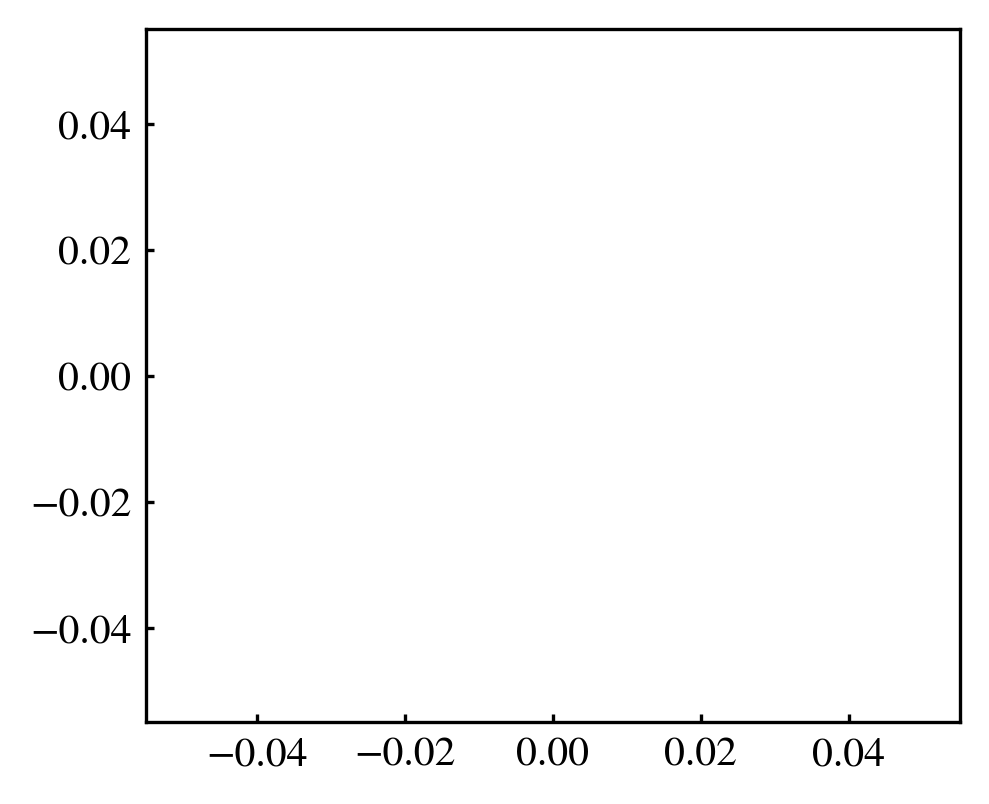

In [43]:
row = dimple_time.iloc[2]
filename = f"{row['name']}_{row.h0:.3f}.csv"
print(filename)
df = pd.read_csv(os.path.join(folder, filename)).dropna()

fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300)
ax.scatter(df.t, df.minima/df.maxima)
popt, pcov = curve_fit(exp_func, df.t, df.minima / df.maxima, p0=(0.9, 10))
ax.plot(df.t, exp_func(df.t, *popt), 'r--', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
residuals = df.minima / df.maxima - exp_func(df.t, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum(((df.minima / df.maxima) - np.mean(df.minima / df.maxima))**2)
r2 = 1 - (ss_res / ss_tot)
plt.text(0.1, 0.1, f'$R^2$ = {r2:.3f}', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Height ratio, $h_{\mathrm{min}}/h_{\mathrm{max}}$")